### Analysis software development v2 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
from scipy.stats import norm


# import data handling class
from DT5550 import *


Open a datafile and read the data

In [2]:
#
# open the datfile / data directory
#
    
#
# loop over all the events
#
dt_max = 10

Etot = []
nmax = 9999

#    while io.read_event() == 0:
#        #
#        # data: io.Q[0:ndet-1] -> energy
#        #       io.ph[0:ndet-1] -> peak height
#        #       io.t[0:ndet-1] -> time without timewalk correction
#        #       io.tc[0:ndet-1] -> time with timewalk correction
#        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
#        #       io.R[0:ndet-1] -> peak/area ratio


# tagged
io = DT5550(indir='C:/data/20220117_104522/')
nf = 0

for file in io.filenames:
    io.open_data(file)
    nf = nf + 1
    if nf>nmax:
        break
    while io.read_event() == 0: 
        # data: io.Q[0:ndet-1] -> energy
        #       io.ph[0:ndet-1] -> peak height
        #       io.t[0:ndet-1] -> time without timewalk correction
        #       io.tc[0:ndet-1] -> time with timewalk correction
        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
        #       io.R[0:ndet-1] -> peak/area ratio
        nh = io.valid.sum()
        
        Etot.append(io.Qraw.sum())
        # for idet in range(N_DETECTOR):
            



print('Processing done')

Etot = np.array(Etot,dtype=object)


#r = np.array(r, dtype=object)

DT5550:: Data recorded with config:  C:/data/20220117_104522\config_20220117_104522.json
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_0.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_1.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_2.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_4.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_5.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_6.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_7.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_8.raw
DT5550:: Open data file: C:/data/20220117_104522\data_20220117_104522_9.raw
Processing done


#### Define fit functions

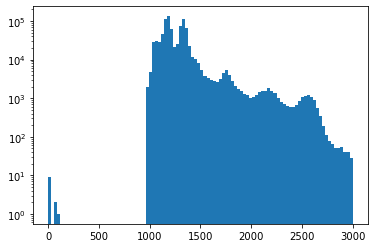

In [3]:
h = plt.hist(Etot,bins=100,range=(0,3000))
plt.yscale('log')